# Анализ причин убыточности рекламной кампании для приложения

**ЦЕЛИ И ХОД ИССЛЕДОВАНИЯ**

**Вводные**:\
Несмотря на вложения в рекламную кампанию Приложения 'xxx', последние месяцы компания терпит убытки. 
    
**Цели**:\
Определить причины неокупаемости рекламной кампании и помочь компании выйти в плюс. 

**Задачи**:\
Для решения вышеуказанных целей мы решим следующие задачи:
* Ознакомимся с данными о пользователях, привлечённых с 1 мая по 27 октября 2019 года (лог сервера с данными об их посещениях, выгрузка их покупок за этот период, рекламные расходы). Для этого, мы осуществим предобработку данных (проверим тип данных, проверим даннные на наличие пропусков, дубликатов)
* Проведем исследовательский анализ данных: выясним, откуда приходят пользователи, какая доля платящих пользователей приходится на каждую страну, какими устройствами они пользуются и из каких каналов привлечения приходят
* Изучим проводимый маркетинг: узнаем, сколько всего затрат было выделено на рекламу, как траты распределены между различными рекламными каналами, сколько стоит привлечение пользователя из каждого источника
* Рассчитаем показатели CAC, ROI, LTV: проанализируем данные показатели в срезах по странам, устройстам, регионам. Выясним, сколько денег приносит каждый клиент, когда расходы на привлечение клиента окупаются, какие факторы мешают привлечению клиентов.


**Описание и структура данных**:\
    Мы будем работать с тремя датасетами. Файл ``visits_info_short.csv`` хранит лог сервера с информацией о посещениях сайта, ``orders_info_short.csv`` — информацию о заказах, а ``costs_info_short.csv`` — информацию о расходах на рекламу.

Структура ``visits_info_short.csv``:\
•	User Id — уникальный идентификатор пользователя\
•	Region — страна пользователя\
•	Device — тип устройства пользователя\
•	Channel — идентификатор источника перехода\
•	Session Start — дата и время начала сессии\
•	Session End — дата и время окончания сессии\

Структура ``orders_info_short.csv``:\
•	User Id — уникальный идентификатор пользователя\
•	Event Dt — дата и время покупки\
•	Revenue — сумма заказа\

Структура ``costs_info_short.csv``:\
•	dt — дата проведения рекламной кампании\
•	Channel — идентификатор рекламного источника\
•	costs — расходы на эту кампанию

### Загрузим данные и подготовим их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

**Откроем файлы и изучим общую информацию**

In [1]:
# импортируем необходмые для дальнейшей работы библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits=pd.read_csv('/datasets/visits_info_short.csv')
orders=pd.read_csv('/datasets/orders_info_short.csv')
expenses=pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
orders.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [5]:
expenses.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


#### **ВИЗИТЫ**

Изучим **общую информацию**

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Узнаем, есть ли **пропуски**

In [7]:
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

Проверим датафрейм на наличие **явных дубликатов**

In [8]:
visits.duplicated().sum()

0

Проверим датафрейм на наличие **неявных дубликатов** - выведем уникальные значения столбцов

In [9]:
visits['Region'].sort_values().unique()

array(['France', 'Germany', 'UK', 'United States'], dtype=object)

In [10]:
visits['Device'].sort_values().unique()

array(['Android', 'Mac', 'PC', 'iPhone'], dtype=object)

In [11]:
visits['Channel'].sort_values().unique()

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds', 'organic'], dtype=object)

Ознакомимся с **типами данных**

In [12]:
visits.dtypes

User Id           int64
Region           object
Device           object
Channel          object
Session Start    object
Session End      object
dtype: object

Тип значений столбцов с началом и концом сессии - *object*. Заменим его на *datetime*

In [13]:
import datetime

In [14]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'])

In [15]:
visits['Session End'] = pd.to_datetime(visits['Session End'])

In [16]:
# проверим сохраненные изменения
visits.dtypes

User Id                   int64
Region                   object
Device                   object
Channel                  object
Session Start    datetime64[ns]
Session End      datetime64[ns]
dtype: object

In [17]:
visits['Session Start'].head()

0   2019-05-01 02:36:01
1   2019-05-01 04:46:31
2   2019-05-01 14:09:25
3   2019-05-01 00:29:59
4   2019-05-01 03:33:35
Name: Session Start, dtype: datetime64[ns]

In [18]:
visits['Session End'].head()

0   2019-05-01 02:45:01
1   2019-05-01 04:47:35
2   2019-05-01 15:32:08
3   2019-05-01 00:54:25
4   2019-05-01 03:57:40
Name: Session End, dtype: datetime64[ns]

*В таблице с визитами пропуски отсутствуют, явные и неявные дубликаты отсутствуют, столбцы с датой начала и конца сессии изменены с типа object на datetime*

#### **ЗАКАЗЫ**

In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Узнаем, есть ли **пропуски**

In [20]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

Проверим датафрейм на наличие **явных дубликатов**

In [21]:
orders.duplicated().sum()

0

Ознакомимся с **типами данных**

In [22]:
orders.dtypes

User Id       int64
Event Dt     object
Revenue     float64
dtype: object

Тип значений столбцов с датой заказа - object. Заменим его на datetime

In [23]:
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])

In [24]:
# проверим сохраненные изменения
orders.dtypes

User Id              int64
Event Dt    datetime64[ns]
Revenue            float64
dtype: object

In [25]:
orders['Event Dt'].head(5)

0   2019-05-01 23:09:52
1   2019-05-01 12:24:04
2   2019-05-01 11:34:04
3   2019-05-01 15:34:40
4   2019-05-01 13:59:51
Name: Event Dt, dtype: datetime64[ns]

*В таблице с заказами пропуски отсутствуют, явные и неявные дубликаты отсутствуют, столбец с датой заказа изменен с типа object на datetime*

#### **РАСХОДЫ**

In [26]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Узнаем, есть ли **пропуски**

In [27]:
expenses.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

Проверим датафрейм на наличие **явных дубликатов**

In [28]:
expenses.duplicated().sum()

0

Проверим датафрейм на наличие **неявных дубликатов**. Выведем уникальные значения столбцов

In [29]:
expenses['Channel'].sort_values().unique()

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds'], dtype=object)

Ознакомимся с **типами данных**

In [30]:
expenses.dtypes

dt          object
Channel     object
costs      float64
dtype: object

Тип значений столбца с датой проведения рекламной кампании - object. Заменим его на datetime

In [31]:
expenses['dt'] = pd.to_datetime(expenses['dt']).dt.date

In [32]:
# проверим сохраненные изменения
expenses.dtypes

dt          object
Channel     object
costs      float64
dtype: object

In [33]:
expenses['dt'].head(5)

0    2019-05-01
1    2019-05-02
2    2019-05-03
3    2019-05-04
4    2019-05-05
Name: dt, dtype: object

*В таблице с затратами пропуски отсутствуют, явные и неявные дубликаты отсутствуют, столбец с датой проведения рекламной кампании изменен с типа object на datetime*

**ВЫВОД ПО БЛОКУ №1**:\
Датафреймы с визитами, заказами, и расходами проверены на предмет наличия пропусков, явных и неявных дубликатов, которых не было обнаружено.\
Также проверены типы данных: во всех трех трех датафреймах тип данных в столбцах, содержащие дату и время, изменен на *datetime*.

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Зададим функции для расчета показателей

Функция для создания **Профилей пользователей** ``get_profiles()``

In [34]:
# функция для создания пользовательских профилей

def get_profiles(visits, orders, expenses):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['User Id', 'Session Start'])
        .groupby('User Id')
        .agg(
            {
                'Session Start': 'first',
                'Channel': 'first',
                'Device': 'first',
                'Region': 'first',
            }
        )
        .rename(columns={'Session Start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['User Id'].isin(orders['User Id'].unique())

 
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'Channel'])
        .agg({'User Id': 'nunique'})
        .rename(columns={'User Id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    expenses = expenses.merge(new_users, on=['dt', 'Channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    expenses['acquisition_cost'] = expenses['costs'] / expenses['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        expenses[['dt', 'Channel', 'acquisition_cost']],
        on=['dt', 'Channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Функция для подсчета **Retention Rate** ``get_retention()``

In [35]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['User Id', 'Session Start']], on='User Id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['Session Start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='User Id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для подсчета **Конверсии** ``get_conversion()``

In [36]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['User Id', 'Event Dt'])
        .groupby('User Id')
        .agg({'Event Dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['User Id', 'Event Dt']], on='User Id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['Event Dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='User Id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для подсчета **LTV** ``get_ltv()``

In [37]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['User Id', 'Event Dt', 'Revenue']], on='User Id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['Event Dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='Revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['User Id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Зададим функции для построения графиков

Функция для **сглаживания данных** ``filter_data()``

In [38]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

Функция для построения **графика Retention Rate** ``plot_retention()``

In [39]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

Функция для построения **графика конверсии** ``plot_conversion()``

In [40]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Функция для **визуализации LTV и ROI** ``plot_ltv_roi``

In [41]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

#### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей

In [42]:
# вызовем функцию get_profiles(), передав ей данные о посещениях, покупках, событиях и тратах на рекламу 
profiles = get_profiles(visits, orders, expenses)
print(profiles.head(5)) 

    User Id            first_ts     Channel  Device         Region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


In [43]:
# установим момент и горизонт анализа данных, мин и макс дату привлечения
from datetime import datetime, timedelta
observation_date = datetime(2019, 11, 1).date() # момент анализа
horizon_days = 14  # горизонт анализа 
print(profiles['dt'].min()) # мин дата привлечения
print(profiles['dt'].max()) # макс дата привлечения

2019-05-01
2019-10-27


*Мы установили момент анализа данных - ``1 ноября 2019`` г, так как это указано в условии задания.\
Горизонт анализа данных - ``14 дней``, так как в условии задания указано, что пользователи должны окупаться не позднее, чем 2 недели после привлечения.\
Мин дата привлечения пользователей - ``1 мая 2019``, макс - ``27 октября 2019``*

#### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.
**Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны**

In [44]:
profiles.groupby('Region').agg({'User Id':'nunique','payer':'mean'}).sort_values(by='payer',ascending=False).style.background_gradient(axis=0, cmap='RdYlGn'
, low=1, high=0.7)

,User Id,payer
Region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


*Пользователи приходят в Приложение из 4 стран: ``США, Германия, Великобритания, Франция``.\
Больше всего пользователей приходится на ``США``, у этой же страны самая высокая доля платящих пользователей.*

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.
**Построем таблицу, отражающую количество пользователей и долю платящих для каждого устройства**

In [45]:
profiles.groupby('Device').agg({'User Id':'nunique','payer':'mean'}).sort_values(by='payer',ascending=False).style.background_gradient(axis=0, cmap='RdYlGn'
, low=1, high=0.4)

,User Id,payer
Device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


*Пользователи пользуются 4 типами устройств: ``Mac, iPhone, Android, PC.``\
Чаще всего пользователи пользуются ``iPhone``, и на втором месте - ``Android``.\
Самая высокая доля платящих пользователей среди пользователей``Mac и iPhone``.*

#### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей.
**Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения**

In [46]:
profiles.groupby('Channel').agg({'User Id':'nunique','payer':'mean'}).sort_values(by='payer',ascending=False).style.background_gradient(axis=0, cmap='RdYlGn'
, low=1, high=0.2)

,User Id,payer
Channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


*Существует 11 каналов привлечения пользователей.\
``ТОП 2`` самых крупных каналов привлечения - ``Organic``,``FaceBoom, Tip Top``.\
Но самая высокая доля платящих пользователей приходится на каналы ``FaceBoom, AdNonSense, lambdaMediaAds``*

**ВЫВОД ПО БЛОКУ №3**:\
Основная часть пользователей приложения Procrastinate Pro+ это люди из ``США``. Большая часть пользователей использует ``iPhone и Android``. Основной канал привлечения - ``Organic``, из платных каналов - ``FaceBoom, TipTop``.

Что касается ``платящих пользователей``, то на ``США`` также приходится наибольшая их часть. БОльшая часть платящих пользователей использует ``iPhone и Mac``, что касается каналов привлечения, здесь лидируют каналы``FaceBoom, AdNonSense, lambdaMediaAds``.

### Маркетинг

#### Посчитаем общую сумму расходов на маркетинг

Уберем из анализа органических пользователей, так как мы исследуем причины провала рекламы, а рекламный бюджет на органических пользователей не тратится

In [47]:
profiles=profiles[profiles['Channel']!='organic']

In [48]:
expenses.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [49]:
# просуммируем значения столбца 'costs'
expenses['costs'].sum().round()

105497.0

*Общая сумма расходов на рекламу - ``105 497 $``*

#### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник

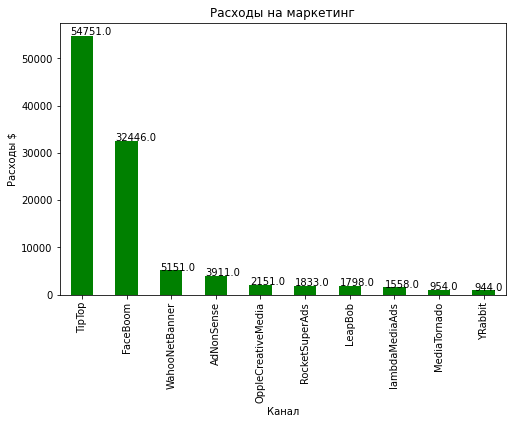

In [50]:
# сгруппируем данные затрат по каналу и посчитаем сумму затрат на каждый канал, построим график
ax=expenses.groupby('Channel')['costs'].sum().round().sort_values(ascending=False).plot(kind='bar',color='green',title='Расходы на маркетинг',xlabel='Канал',ylabel='Расходы $',figsize=(8,5));
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() *1.005, p.get_height() * 1.005))

In [51]:
# построим сводную таблицу, чтобы посчитать посчитаем % затрат на каждый канал
ads_by_channels = expenses.pivot_table(index='Channel',values=['costs'],aggfunc=sum,margins=True).reset_index()

In [52]:
ads_by_channels['percantage']=(ads_by_channels.loc[:,'costs'] / ads_by_channels.loc[10,'costs']*100).round()
ads_by_channels.sort_values(by='percantage',ascending=False)

,Channel,costs,percantage
10,All,105497.30,100.0
6,TipTop,54751.30,52.0
1,FaceBoom,32445.60,31.0
7,WahooNetBanner,5151.00,5.0
0,AdNonSense,3911.25,4.0
2,LeapBob,1797.60,2.0
4,OppleCreativeMedia,2151.25,2.0
5,RocketSuperAds,1833.00,2.0
3,MediaTornado,954.48,1.0
8,YRabbit,944.22,1.0


*Большая часть рекламных затрат приходится на источник ``Tip Top (52%, 54751)``, на втором месте - ``FaceBoom (31%, 32446)``.\
Расходы на ``оставшиеся`` платформы значительно меньше ``(1-5%, от 944 до 5151)``*

#### Построем визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику

In [53]:
# извдечем из даты месяц и вынесем его в отдельный столбец
expenses['month']=pd.to_datetime(expenses['dt']).dt.month

In [54]:
# извдечем из даты неделю и вынесем ее в отдельный столбец
expenses['week']=pd.to_datetime(expenses['dt']).dt.isocalendar().week

In [55]:
expenses.head(5)

,dt,Channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,5,18
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18


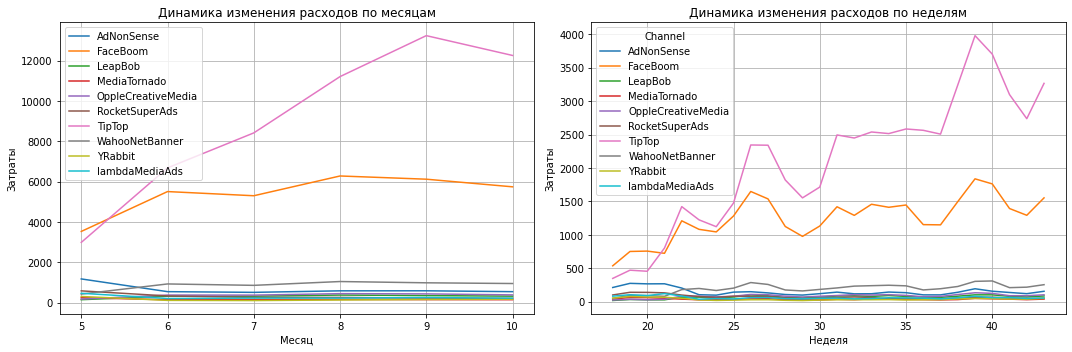

In [56]:
# построим графики динамики изменения расходов в срезах по месяцам и неделям, разместим их вместе

plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 2, 1)
expenses_month_data = expenses.pivot_table(index='month', columns='Channel', values='costs', aggfunc='sum')
expenses_month_data.plot(grid=True, ax=ax1)
plt.legend()
plt.title('Динамика изменения расходов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Затраты')

ax2 = plt.subplot(1, 2, 2)
expenses_week_data = expenses.pivot_table(index='week', columns='Channel', values='costs', aggfunc='sum')
expenses_week_data.plot(grid=True, ax=ax2)
plt.title('Динамика изменения расходов по неделям')
plt.xlabel('Неделя')
plt.ylabel('Затраты')

plt.tight_layout()
plt.show()

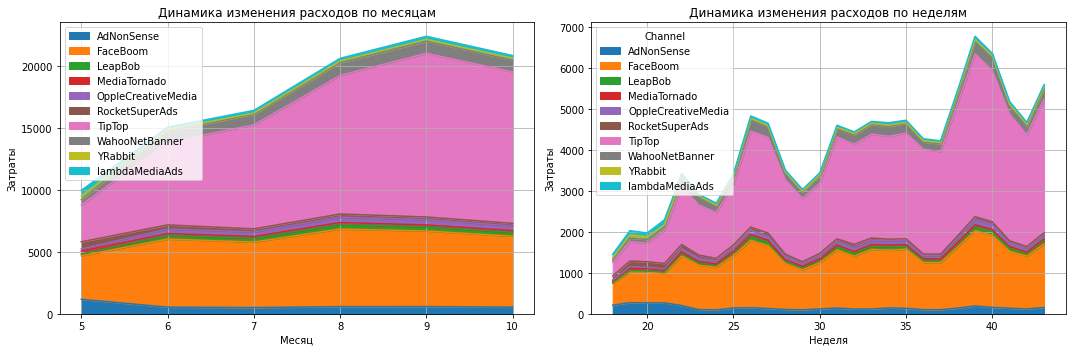

In [57]:
# дополнительно построим графики динамики изменения расходов с накоплением

plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 2, 1)
expenses_month_data = expenses.pivot_table(index='month', columns='Channel', values='costs', aggfunc='sum')
expenses_month_data.plot(kind='area', grid=True, ax=ax1)
plt.legend()
plt.title('Динамика изменения расходов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Затраты')

ax2 = plt.subplot(1, 2, 2)
expenses_week_data = expenses.pivot_table(index='week', columns='Channel', values='costs', aggfunc='sum')
expenses_week_data.plot(kind='area', grid=True, ax=ax2)
plt.title('Динамика изменения расходов по неделям')
plt.xlabel('Неделя')
plt.ylabel('Затраты')

plt.tight_layout()
plt.show()

*Графики изменения расходов подверждают предыдущий вывод - больше всего затрат приходится на источники ``TipTop и FaceBoom``.\
Графики показывают, что динамика расходов на разные каналы отличается. Например, по источнику``TipTop`` начиная с мая раходы ежемесячно росли и в сентябре достигли своего пика ``(до 13000)``.\
Расходы на ``FaceBoom`` тоже показывали рост, но они достаточно однородны и держались в диапозоне ``от 4000 до 6000``.\
По ``оставшимся платформам`` расходы практически не менялись, и не превышали ``1000``*

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника

In [58]:
profiles.groupby('Channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost',ascending=False).style.background_gradient(axis=0)

,acquisition_cost
Channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


*ТОП3 источника с самым высоким САС:*
- TipTop (2.79)
- FaceBoom (1.11)
- AdNonSense (1.00)

**ВЫВОД ПО БЛОКУ №4:**
- Общая ``сумма расходов`` на рекламу составляет ``105497``
- Больше всего денег на рекламу вкладывается в ``Tip Top (52% от всех затрат)``, на втором месте - в ``FaceBoom (31%)``. Расходы на ``оставшиеся платформы`` составляют всего ``1-5%`` от общего бюджета
- Динамика расходов по источникам отличается. Расходы на рекламу для привлечения пользователей из источника ``TipTop ежемесячно росли`` и в сентябре достигли своего пика ``(до 13000)``.\
Расходы на ``FaceBoom`` держались в диапозоне ``от 4000 до 6000``.
По ``оставшимся платформам`` расходы не превышали ``1000``.
- Для TipTop, FaceBoom и AdNonSense средняя стоимость привлечения одного пользователя обходится дороже всего.\
``TipTop - 2.8, FaceBoom - 1.1, AdNonSense - 1``


### Оценим окупаемость рекламы

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI

Рассчитаем и визуализируем LTV и ROI, вызвав функции ``get_ltv()`` и ``plot_ltv_roi()``

In [59]:
# установим момент и горизонт анализа данных
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

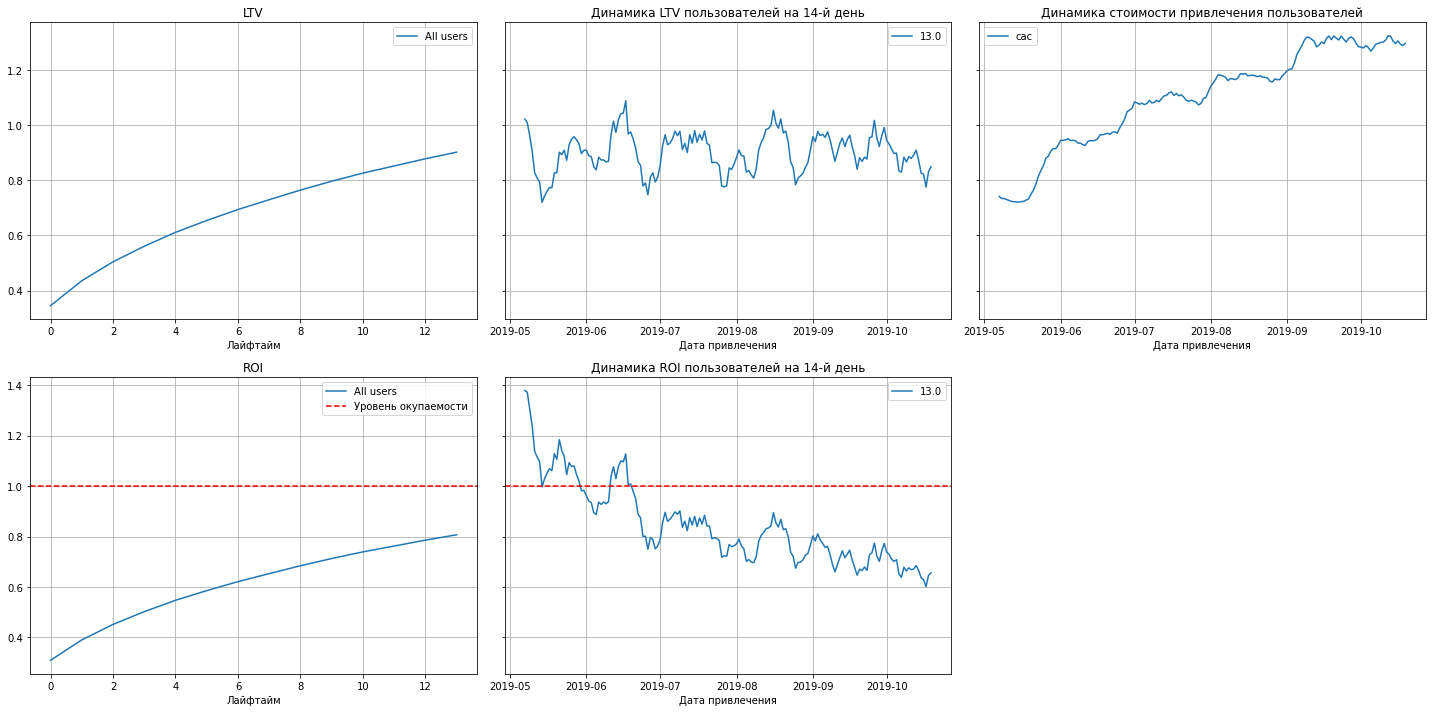

In [60]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

*Графики показывают, что реклама не окупается. Показатель ROI за 14 дней так и не достиг точки окупаемости.\
Рекламный бюджет увеличивается, но не значительно. Средняя стоимость привлечения пользователя, привлеченного с сентября по октябрь - самая высокая.\
LTV показывает рост от лайфтайма к лайфтайму, а значит, что с каждый днем пользователи приносили больше денег.*

*Общие графики не информативны. Чтобы разобраться в проблеме, необходимо пройтись по всем характеристикам пользователя: страна, канал привлечения, устройство*

Проанализируем окупаемость рекламы с разбивкой **по странам**

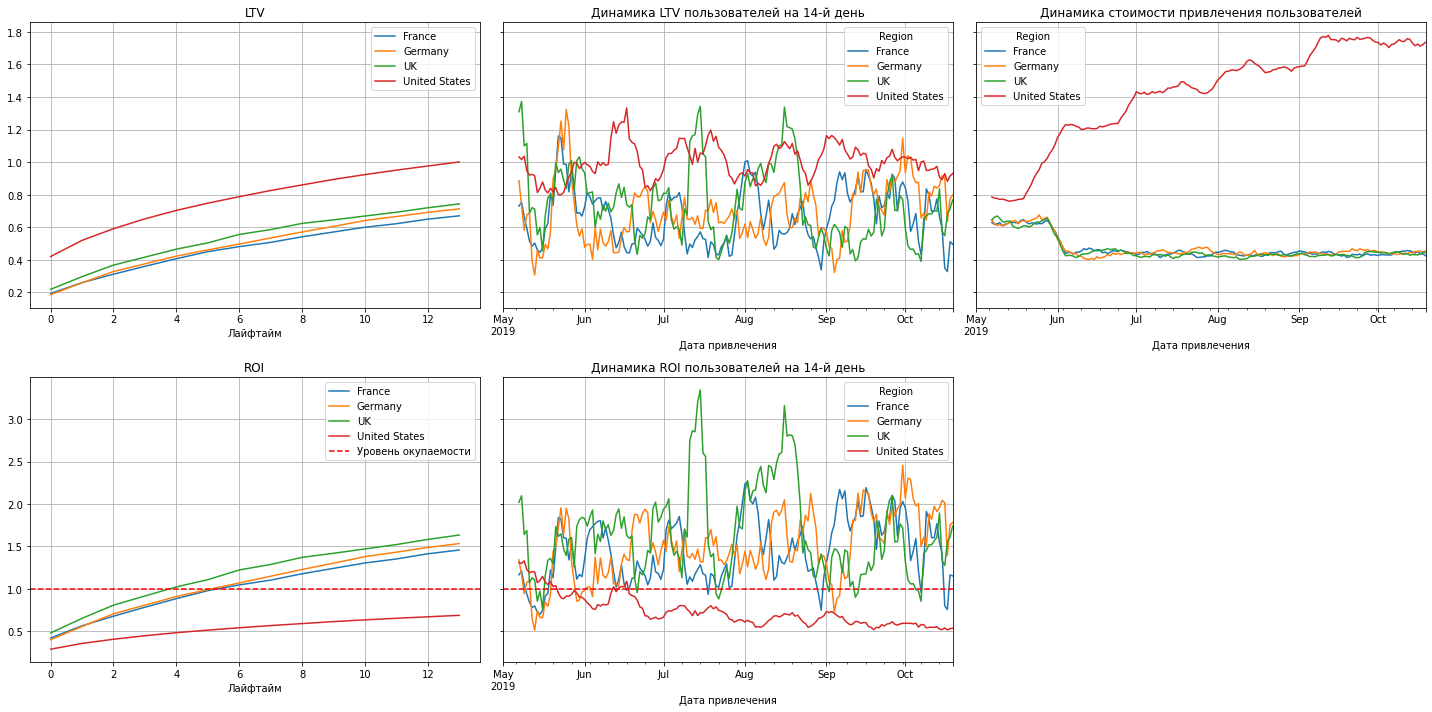

In [61]:
dimensions=['Region']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

*На графиках видно, что реклама не окупается только в США. С оставшимся 3 странам проблем нет - в них реклама начала окупаться уже примерно с 3-5го дня.\
Стоимость привлечения пользователя из США самая большая и по сравнению с другими странами обходится в несколько раз дороже. Динамика графика изменения LTV в США совпадает с динамикой на общем графике. Значит, расходы на США оказывают такое сильное влияние на общие показатели. В то же время, пользователь из США приносит бизнесу больше всего денег, но тем не менее, расходы значительно превышают доходы, поэтому, реклама не окупается.*

Проанализируем окупаемость рекламы с разбивкой **по каналам**

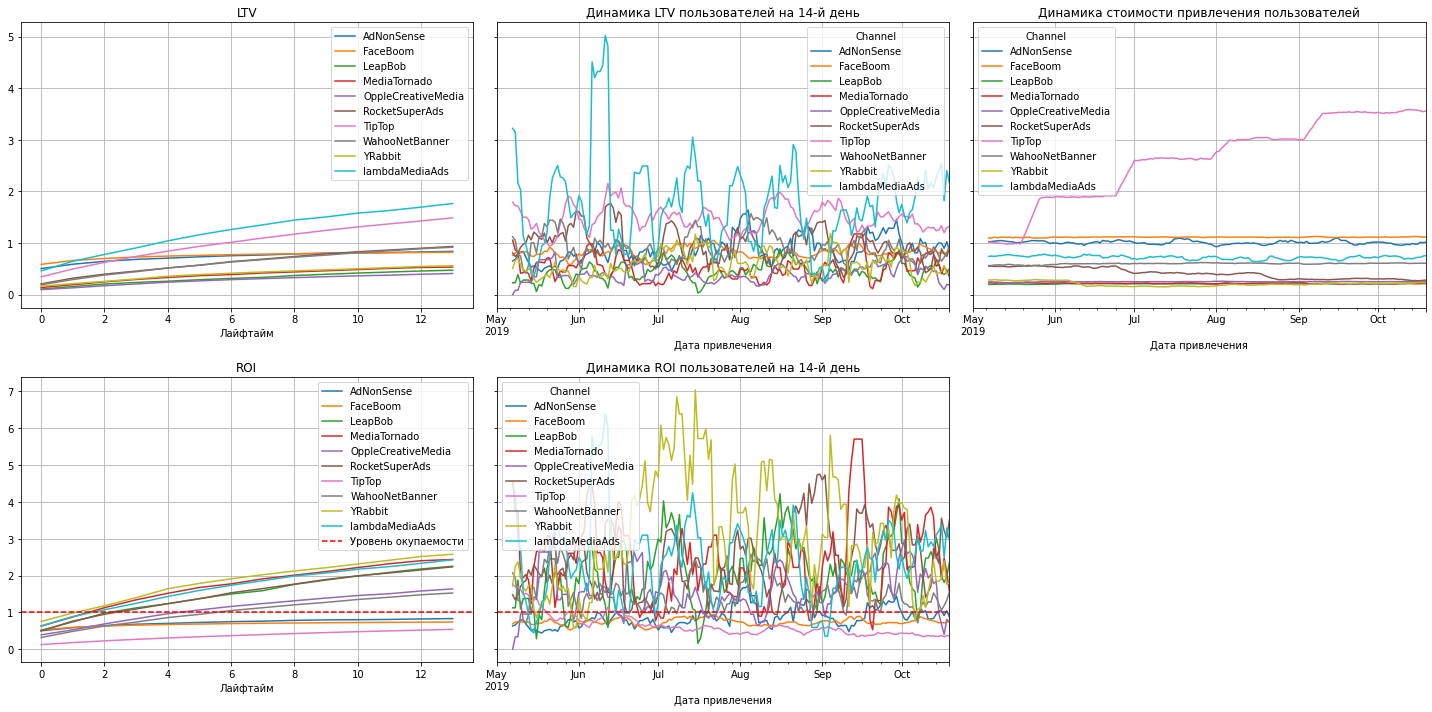

In [62]:
dimensions=['Channel']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

*Реклама не окупается только по 3 платформам: TipTop, FaceBom, AdNonSense. По всем осталным начала окупаться уже со 2-5 дня.\
На эти 3 платформы выделяется самый большой рекламный бюджет. TipTop - лидер (расходы на него значительно выше, чем на другие платформы). И они росли с каждым месяцем.\
Доход от пользователей, привлеченных с платформы TipTop тоже рос, но стоимость затрат превышала доходы, поэтому неудевительно, реклама не окупается.\
Зато источник LamdaMediaAds приносит больше всего доходов, и это при значительно меньших затратах.*

Проанализируем окупаемость рекламы с разбивкой **по устройствам**

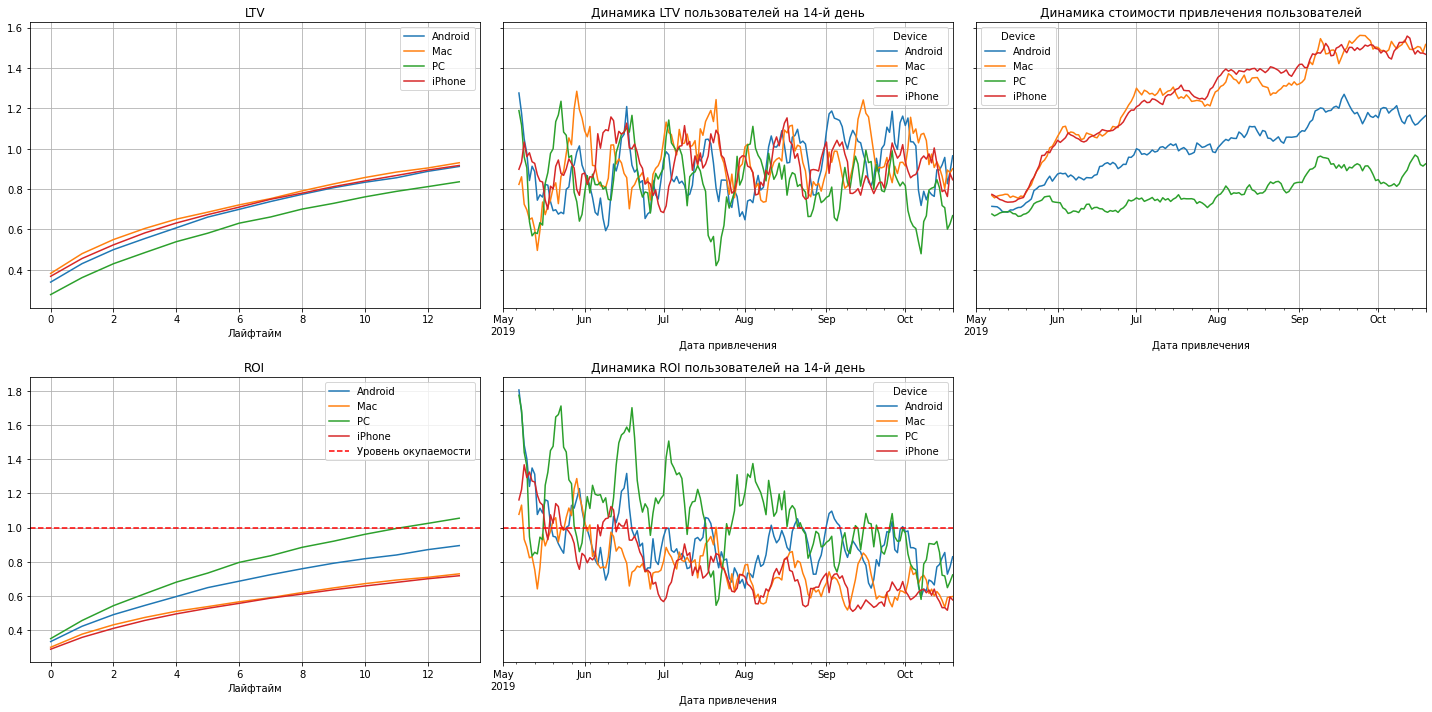

In [63]:
dimensions=['Device']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

*Окупаются только пользователи PC, но только 11 дню.\
Пользователи Mac, iPhone и Android не окупаются.\
В то же время, стоимость привлечения пользователя iPhone и Mac - самая высокая: в 3р дороже, чем PC, и в 1.5 р дороже, чем Android.\
Пользователи Mac, iPhone и Android приносят примерно равнозначный объем денег, но так как расходы превышают доходы, реклама не окупается*

#### Проверим КОНВЕРСИЮ пользователей и динамику её изменения

Проверим конверсию и динамику ее изменения с разбивкой **по странам**

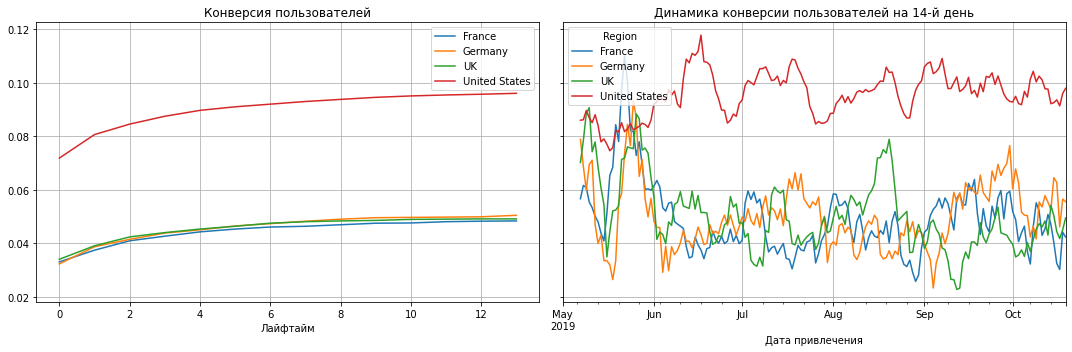

In [64]:
# смотрим конверсию и динамику ее изменения с разбивкой по регионам
dimensions=['Region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

*Графики показывают, что пользователи из США конвертируются очень хорошо - вдвое лучше, чем пользователи других стран*

Проверим конверсию и динамику ее изменения с разбивкой **по каналам**

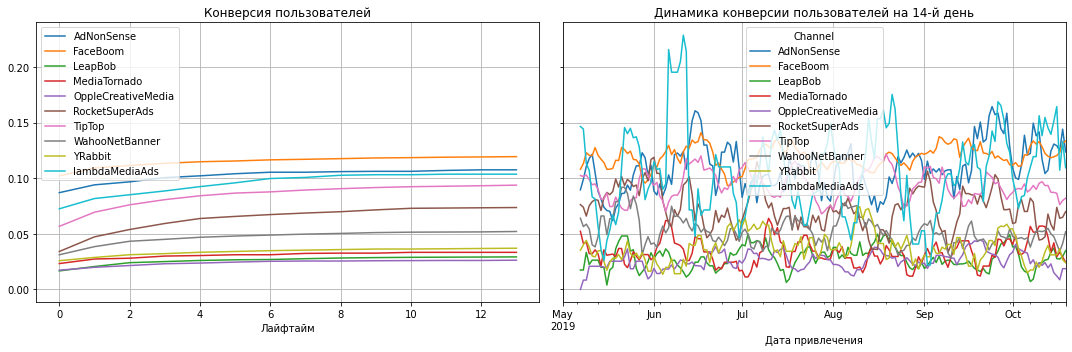

In [65]:
# смотрим конверсию и динамику ее изменения с разбивкой по каналам
dimensions=['Channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

*Лучше всего конвертируются пользователи, привлеченные из источников FaceBoom, AdNonSense, LamdaMediaAds и TipTop.\
По всем источникам конверсия сохраняет равномерную динамику*

Проверим конверсию и динамику ее изменения с разбивкой **по устройствам**

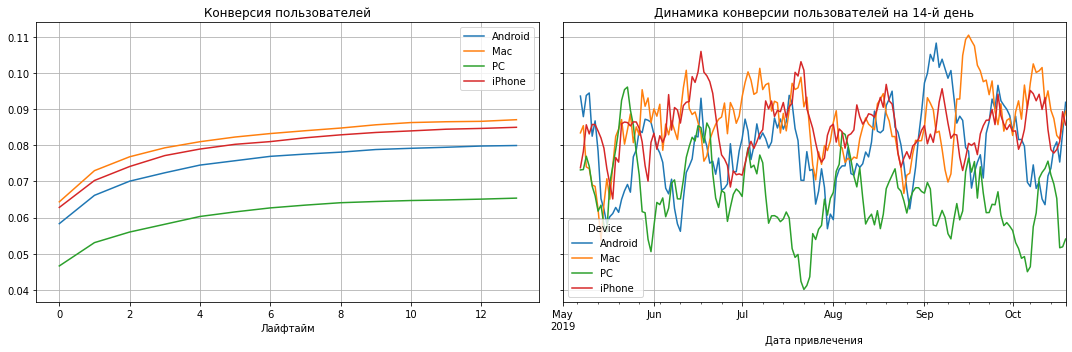

In [66]:
# смотрим конверсию и динамику ее изменения с разбивкой по устройствам
dimensions=['Device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

*Лучше всего конвертируются пользователи Mac и iPhone. По всем устройствам на протяжении всех 14 дней конверсия сохраняет равномерную динамику, и даже немного показывает рост.*

#### Проверим УДЕРЖАНИЕ пользователей и динамику его изменения. Построим графики удержания.

Вызовем функции ``get_retention()`` и ``plot_retention()``

Проверим удержание и динамику ее изменения с разбивкой **по странам**

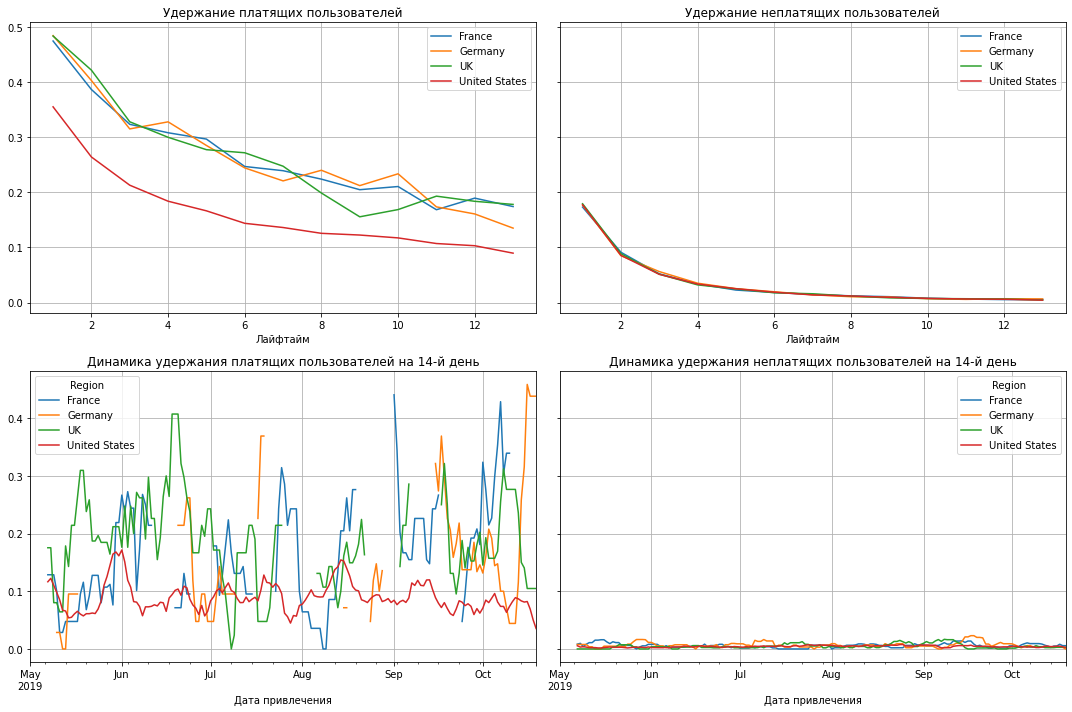

In [67]:
# смотрим удержание с разбивкой по регионам

dimensions=['Region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

*Самое низкое удержание по платящим пользователям - у пользователей из США. По остальным 3 странам показатель примерно одинковый. Динамика удержания по всем странам на протяжении 14 дней - падающая*

Проверим удержание и динамику ее изменения с разбивкой **по каналам**

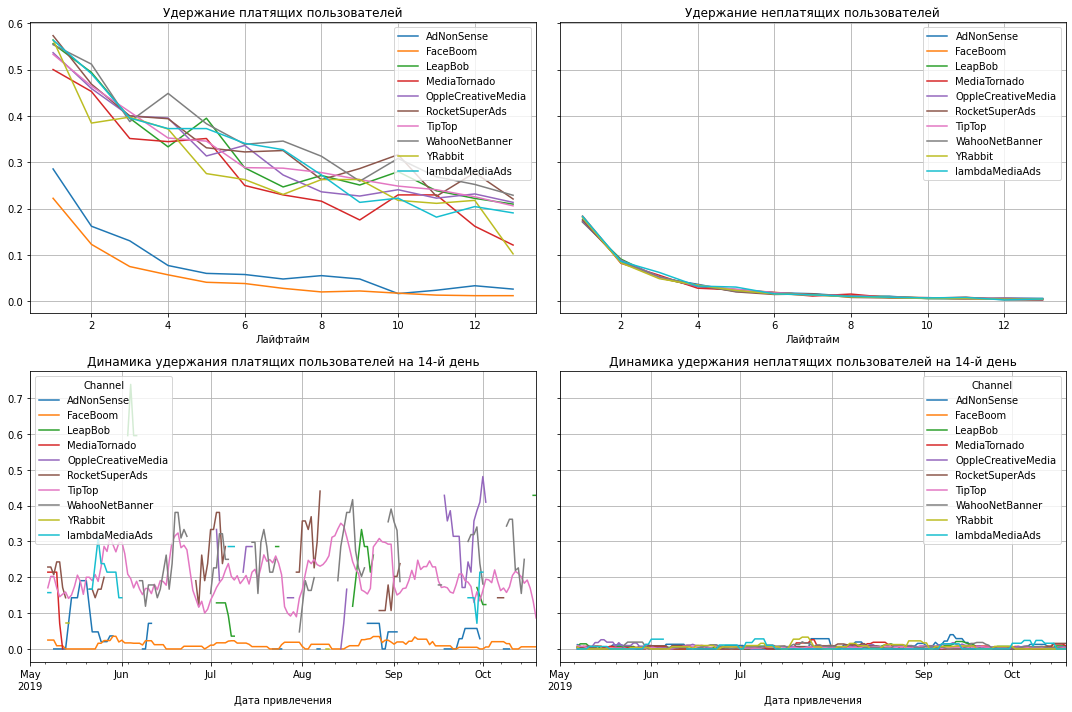

In [68]:
# смотрим удержание с разбивкой по каналам
dimensions=['Channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

*Худшие показатели по удержанию у платящих пользователей - по каналам FaceBoom и AdNonSense. По остальным платформам примерно одинаковое.*

Проверим удержание и динамику ее изменения с разбивкой **по устройствам**

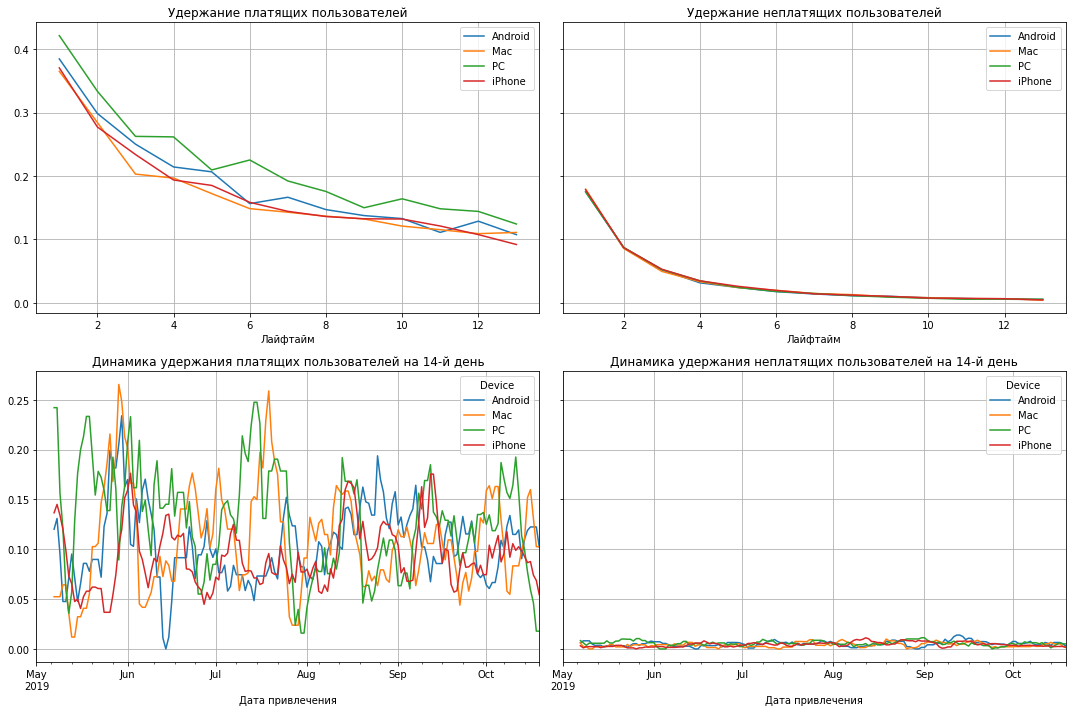

In [69]:
# смотрим удержание с разбивкой по устройствам
dimensions=['Device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

*Удержание платящих пользователей по разным устройстам отличается не сильно. Лучше всего удерживаются пользователи PC*

Как мы ранее выяснили, в целом, реклама, направленная на привлечение пользователей, не окупается.\
Очевидно, что негативное влияние на окупаемость рекламы оказывает ``США`` - это единственная страна, в которой не окупается реклама. Расходы на рекламу сильно превышают доходы, которые приносит клиент. Также не смотря на самую высокую конверсию, пользователи из США удерживаются значительно хуже, чем в других странах.

Что касается ``каналов привлечения``, то негативное влияние на окупаемость могут оказывать каналы ``TipTop, FaceBoon, AdNonSense``: по данным платформам самая высокая стоимость пользователя, значительно больше доходов, которые он приносит. У платформ ``FaceBoom и AdNonSense`` еще и низкий показатель удержания.

Что касается ``устройств``, особое негативное влияние могут оказывать ``iPhone и Mac`` - несмотря на лучшую конверсию и чуть более низкие, чем у PC и Android показатели удержания, расходы на привлечение превышают расходы, за счет чего, реклама не окупается.

**Поскольку проблема кроется в США, изучим дополнительно данные по США**

Посмотрим ``ROI, LTV и ROI`` в срезах **по устройствам**

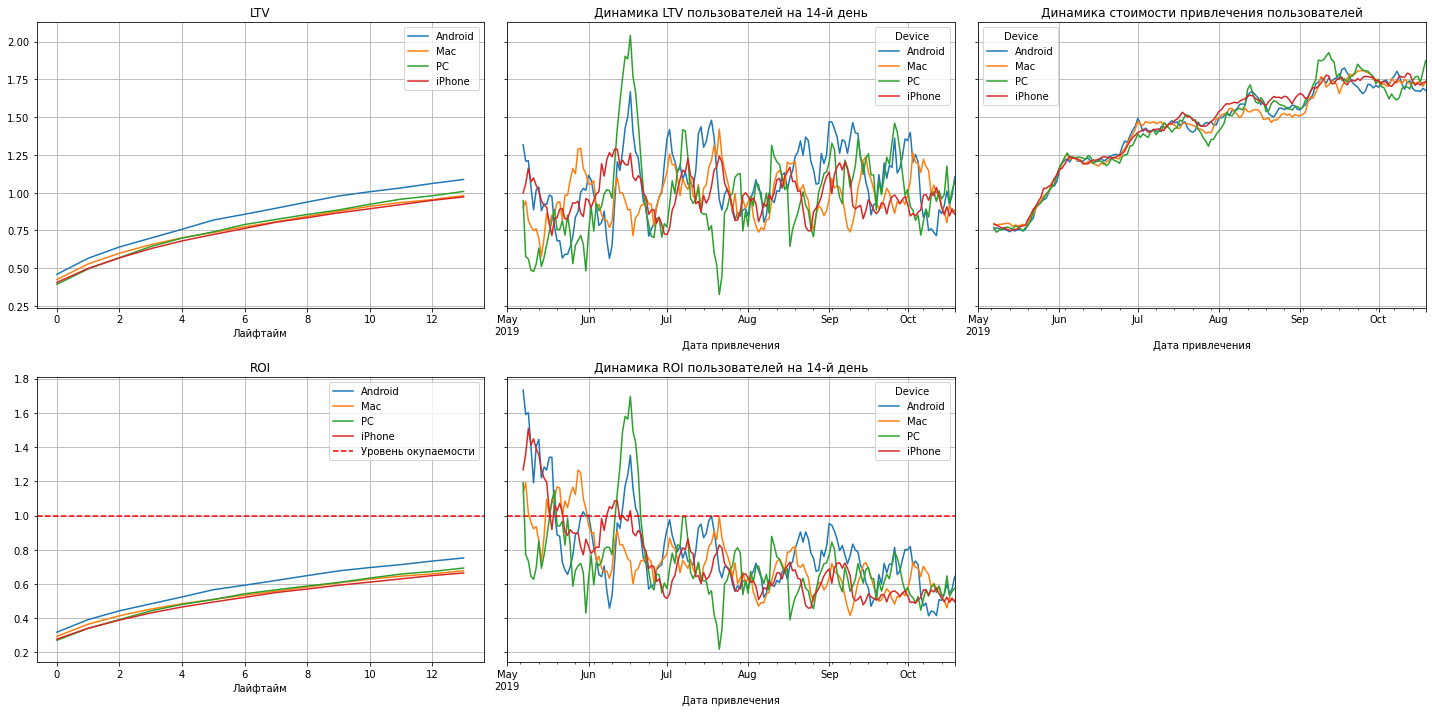

In [70]:
dimensions=['Device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('Region=="United States"'), orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

*Видно, что пользователи ни одного из устройств не окупаются. Средний доход от пользователя растет, но расходы сильно превышают доход*

Посмотрим ``Конверсию`` в срезах **по устройствам**

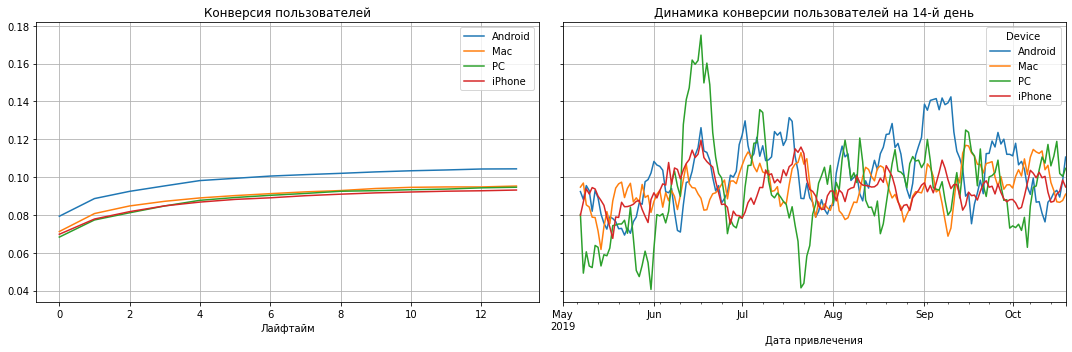

In [71]:
dimensions=['Device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('Region=="United States"'), orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

*Судя по графикам, пользователи всех устройств конвертируются неплохо и стабильно*

Посмотрим ``Удержание`` в срезах **по устройствам**

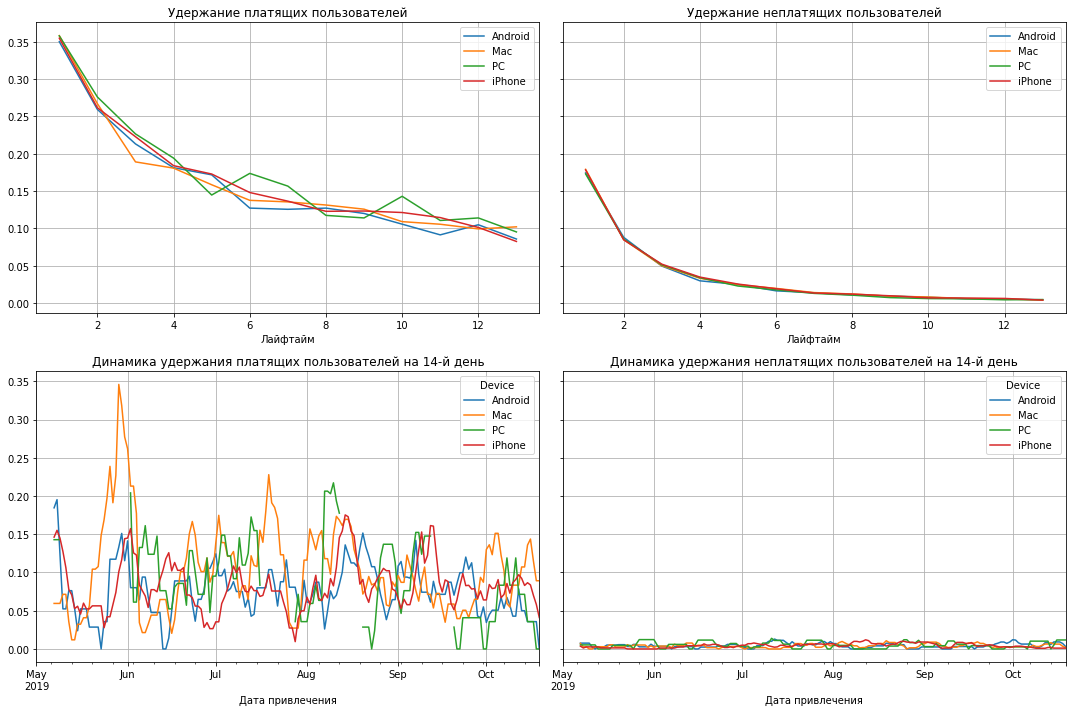

In [72]:
dimensions=['Device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('Region=="United States"'), visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

*График показывает, что пользователи всех устройств плохо удерживаются с одинаковой динамикой. Начиная с первого дня удержание показывает отрицательную динамику и к 14 дню показатель удержания снижается почти в 3 раза*

Посмотрим, как обстоят дела в срезах по каналам. Посмотрим показатели ``LTV, CAC и ROI``в срезах **каналам**

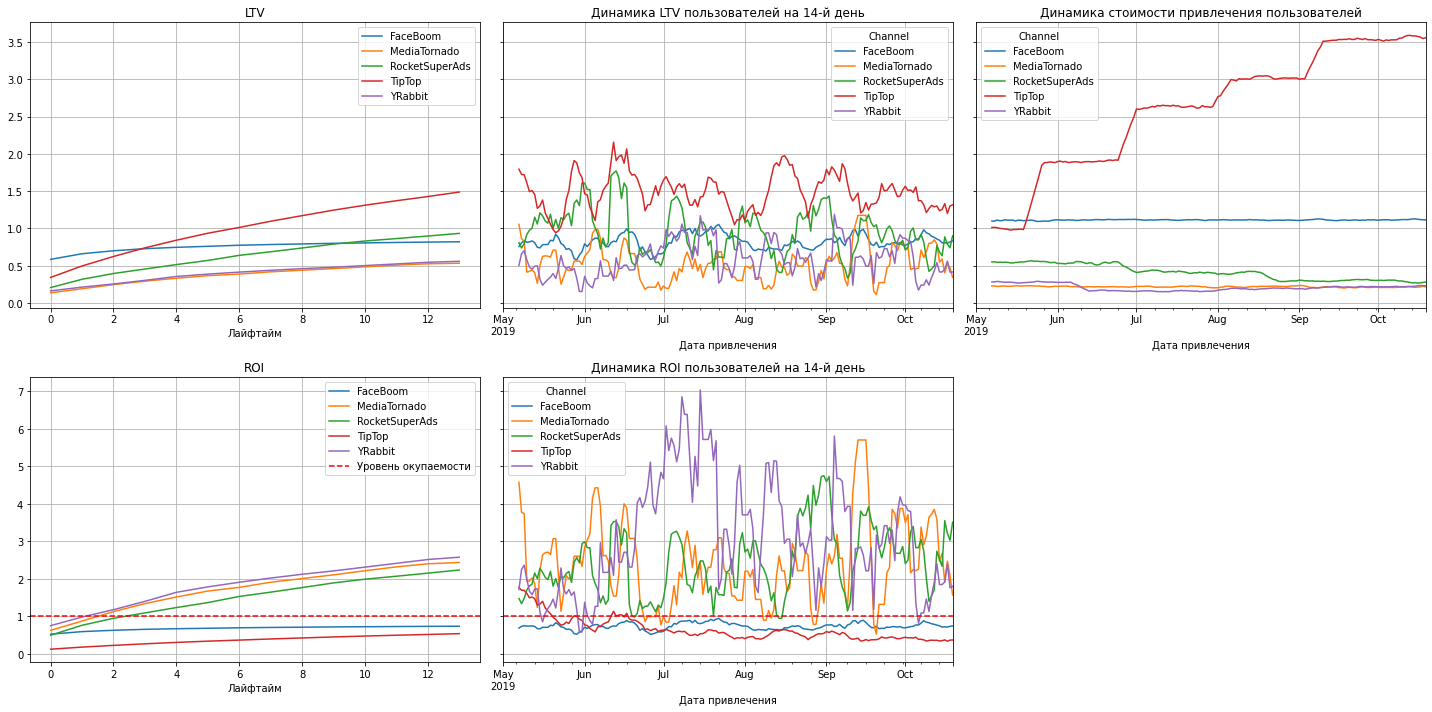

In [73]:
dimensions=['Channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('Region=="United States"'), orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

*Очевидно, что на рекламу на платформу TipTop тратится несоизмеримо с другими источниками много денег. При том, что средние доходы от пользователя по этой платформе лишь немного выше доходов от других источников. Поэтому, реклама и не окупается.\
Реклама на FaceBoom также обходится дороже оставшихся источников, в то время как доходов приносит примерно на уровне оставшихся 3 платформ.*

Посмотрим ``Конверсию`` в срезах **по каналам**

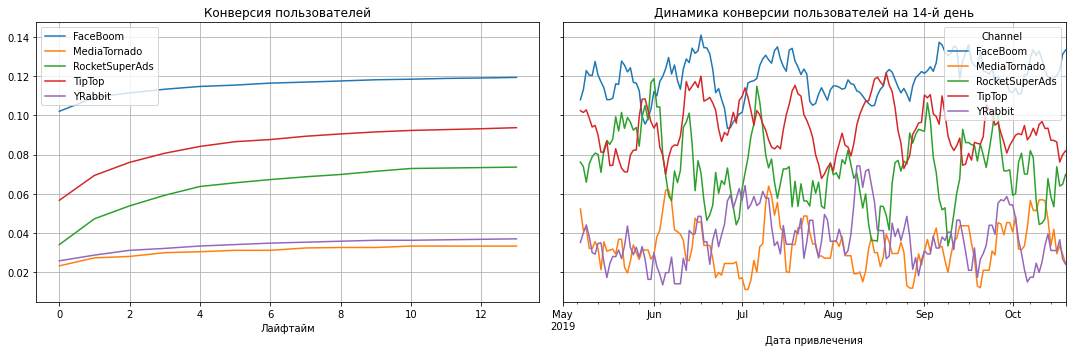

In [74]:
dimensions=['Channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('Region=="United States"'), orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

*Видно, что пользователи FaceBoom конвертируются лучше всех. На втором месте - TipTop, на третьем - RocketSUperAds.*

Посмотрим ``Удержание`` в срезах **по каналам**

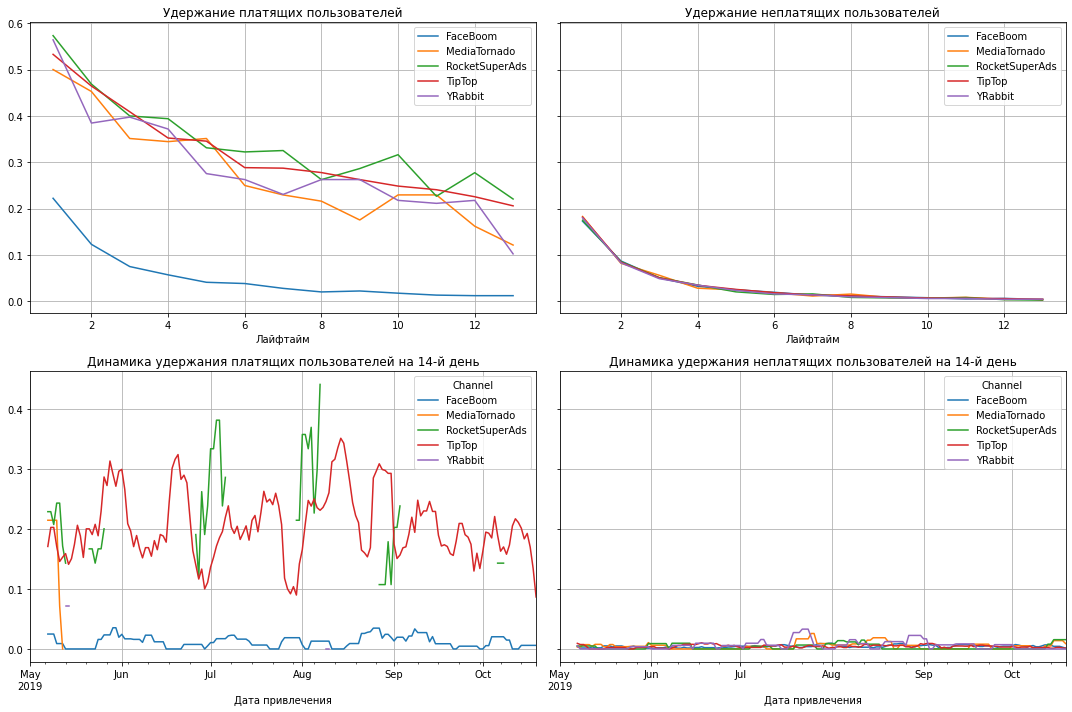

In [75]:
dimensions=['Channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('Region=="United States"'), visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

*Несмотря на то, что пользователи FaceBoom лучше всего конвертируются, они удерживаются хуже всех остальных пользователей.\
Зато мы видим платформы, TipTop и RocketSuperAds, несмотря на чуть более низкую конверсию, неплохо удерживаются, как и YRabbit.*

**Вводный обзор по анализу Приложения Procrastinate Pro+**:\
Приложением ``Procrastinate Pro+`` пользуются люди из 4 стран: ``США, Германия, Франция, Великобритания``.
Самый крупный рынок пользователей – ``США (около 67%)``. У этой же страны самая высокая доля платящих пользователей. Оставшаяся часть пользователей почти равномерно распределена между оставшимися тремя странами.\
Пользователи заходят в Приложение с 4 видов устройств: ``iPhone, Mac, Android, PC``. Чаще всего – c ``iPhone и Android``. Самая высокая доля платящих пользователей - у ``Mac и iPhone``.\
Самые крупные каналы привлечения пользователей в Приложение – ``Organic (38%)``, ``FaceBoom (19%)``и ``Tip Top (13%)``. 
Но в платящих лучше конвертируются пользователи, привлеченные из каналов ``FaceBoom, AdNonSense, lambdaMediaAds``.

**Общий анализ рекламной кампании**\
Запуск рекламной кампании для Приложения Procrastinate Pro+ обошелся в ``105 497$``.\
``Половина расходов`` была выделена на привлечение пользователей из канала ``TipTop``, ``31% - на FaceBoom``, ``оставшаяся часть`` распределена на другие платформы почти ``равномерно``. Расходы на ``TipTop`` росли с каждым месяцем с начала запуска рекламной кампании.\
Несмотря на запуск рекламной кампании, последние несколько месяцев компания терпит убытки. За 14 дня ROI так и не достиг точки окупаемости. 

Проведя анализ данных, мы выяснили, что в ``Германии, Франции и Великобритании`` реклама начала ``окупаться`` уже со 2-5 дня. В ``США`` реклама так и ``не окупилась``, так как расходы на рекламу в ``США`` несоизмеримо ``велики`` с расходами на другие страны. При этом LTV в США (средний доход, который приносит клиент) лишь немного больше, чем в других странах. Соответственно, именно США оказывает негативное влияние на окупаемость рекламы.\
В то же время пользователи Приложения из ``США`` конвертируются в платящих вдвое ``лучше``, чем в других 3 странах. Показатель Conversion – самый лучший. Несмотря на это, у пользователей ``США`` самый низкий показатель ``Retention Rate`` (коэффициент удержания).

**Анализ данных по США**\
Углубляясь в анализ данных уже по США мы определили, что на платформу ``TipTop`` был израсходован самый ``большой бюджет``, который в несколько раз больше дохода. Поэтому, реклама и не окупается.\
Реклама на ``FaceBoom`` также обходится ``дороже других источников``, и расходы также превышают доходы, хоть и в меньшей пропорции, чем по TipTop.\
Пользователи ``FaceBoom`` конвертируются лучше всех. Скорей всего, это и объясняется большими расходами на привлечение. На втором месте по конвертации - ``TipTop``, на третьем - ``RocketSUperAds``. Но несмотря на то, что пользователи ``FaceBoom`` имеют лучший ``Conversion Rate``, они удерживаются хуже всех остальных пользователей.\
Зато такие платформы как ``TipTop, RocketSuperAds и YRabbit``, несмотря на более низкую конверсию, удерживаются намного лучше TipTop.

**Рекоммендации**\
Поскольку реклама не окупается только в ``США``, стоит ``пересмотреть/модифицировать концепцию продвижения`` Приложения Procrastinate Pro+ в данном регионе. 
- Во-первых, можно рассмотреть возможность проведения рекламных и маркетинговых мероприятий, направленных на удержание уже существующих пользователей всех 4 устройств. Ведь ``конверсия этих пользователей стабильная``, а показатель ``Retention Rate`` падает с каждым днем. Вероятно, пользователи скачивают Приложение, но по какой-то причине теряют к нему интерес.
- Во-вторых, стоит пересмотреть объем рекламных затрат, вкладываемых в канал ``TipTop``, ведь расходы на него несоизмерими с доходами.\
Та же рекомендация применима к ``FaceBoom``. Затраты на привлечение пользователей также превышают доход. Также, конверсия пользователей с этой платформы самая высокая, а вот ``Retention Rate`` – самый низкий. Возможно, стоит перераспределить расходы на привлечение пользователей и выделить часть из них на удержание уже существующих.
- В-третьих, стоит обратить внимание на альтернативные каналы привлечения - ``RocketSuperAds и YRabbit``. Несмотря на самую низкую конверсию, они имеют хороший ``Retention Rate``. Возможно в данном случае наоборот стоит рассмотреть возможность использования рекламного бюджета для увеличения конверсии, так как эти каналы могут быть перспективными.